In [1]:
import util
import baseline
import numpy as np

from sklearn.preprocessing import StandardScaler
class OptionalStandardScaler(StandardScaler): # class taken from transfer learning paper
    def __init__(self, on=False):
        super(OptionalStandardScaler, self).__init__(with_mean=True, with_std=True)

In [2]:
b = baseline.Model()

loaded audio
loaded filenames


In [3]:
b.baseline()

starting mfccs


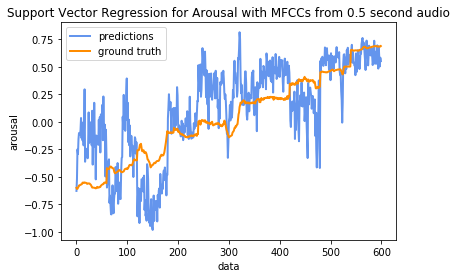

pearson correlation coefficient 0.743149140034


In [20]:
import matplotlib.pyplot as plt
import scipy
predictions = b.clf.predict(b.test_arousal_mfcc)
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
plt.plot(np.array(range(len(b.test_arousal_labels))), b.test_arousal_labels, color='darkorange', lw=lw, label='ground truth')
plt.xlabel('data')
plt.ylabel('arousal')
plt.title('Support Vector Regression for Arousal with MFCCs from 0.5 second audio')
plt.legend()
plt.show()
print 'pearson correlation coefficient', (np.corrcoef(predictions, b.test_arousal_labels)[0, 1])

In [45]:
from util import *
train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 0.5, b.audio)
test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.test_valence_filenames, 0.5, b.audio)
valenceCLF = pickle.load( open( "baseline_test_1_valence.sav", "rb" ) )

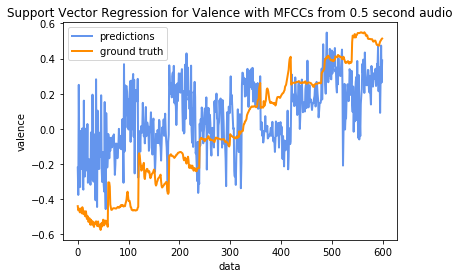

pearson correlation coefficient 0.561247698504


In [47]:
predictions = valenceCLF.predict(calcMFCCs(test_valence_audio))
lw = 2
plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
plt.plot(np.array(range(len(b.test_valence_labels))), b.test_valence_labels, color='darkorange', lw=lw, label='ground truth')
plt.xlabel('data')
plt.ylabel('valence')
plt.title('Support Vector Regression for Valence with MFCCs from 0.5 second audio')
plt.legend()
plt.show()
print 'pearson correlation coefficient', (np.corrcoef(predictions, b.test_valence_labels)[0, 1])

In [39]:
for i in [0, 1, 2, 3, 4, 5]:
    train_valence_audio, dumby_doo_doo, train_valence_labels = split_set(b.train_valence_filenames, 2**i, b.audio)
    test_valence_audio, dumby_doo_doo, test_valence_labels = split_set(b.test_valence_filenames, 2**i, b.audio)
    train_arousal_audio, train_arousal_labels, dumby_doo_doo = split_set(b.train_arousal_filenames, 2**i, b.audio)
    test_arousal_audio, test_arousal_labels, dumby_doo_doo = split_set(b.test_arousal_filenames, 2**i, b.audio)
    arousal_filename = 'MODEL_arousal_mfcc_'+str(2**i)+'_seconds.sav'
    valence_filename = 'MODEL_valence_mfcc_'+str(2**i)+'_seconds.sav'
    b.train(train_arousal_labels, calcMFCCs(train_arousal_audio), arousal_filename)
    b.train(train_valence_labels, calcMFCCs(train_valence_audio), valence_filename)

training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.3894087874, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-37.3414976111, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.724515200977, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.3894087874, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-

[Parallel(n_jobs=3)]: Batch computation too fast (0.0622s.) Setting batch_size=6.


[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-34.8527434335, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.503068964637, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-7.94935880458, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.702139619386, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-34.8527434335, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__

[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.5s


[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-31.9368093868, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.71185133524, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.517921650198, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-31.9368093868, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-35.024591558, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, 

[Parallel(n_jobs=3)]: Done  40 tasks      | elapsed:    1.0s


[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-9.22473402365, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-28.1773179521, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-1.66670064087, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.96795917542, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.0791182018306, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.001953

[Parallel(n_jobs=3)]: Done  78 tasks      | elapsed:    1.9s


[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-33.4144069034, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-28.1773179521, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-7.96795917542, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-9.22473402365, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.019925640459, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.576112500229, total=   0.

[Parallel(n_jobs=3)]: Done 120 tasks      | elapsed:    2.6s


[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-10.2777471392, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-9.22473402365, total=   0.1s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-7.96795917542, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.019925640459, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.0791182018306, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd

[CV] stdd__on=True, clf__C=2.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-24.1824815225, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-5.01037479768, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-8.09894785306, total=   2.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-24.1824815225, total=   0.0s
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-8.54405255247, total=   6.5s
[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-24.1824815225, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=8.0, clf

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:  1.1min finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.2516210321, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.129118229803, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-57.3870798364, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.2516210321, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.129118229803, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0549s.) Setting batch_size=6.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s


[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.377238387217, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-21.5532496291, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-41.9303103867, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-23.6477232374, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-1.10937647362, total=   0.0s
[CV] clf__gamma=0.0078125, stdd

[Parallel(n_jobs=3)]: Done  24 tasks      | elapsed:    0.4s


[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.437825284886, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-22.1531558493, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-21.4972360553, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-38.7606708764, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-1.29340428377, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, 

[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.9s


[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.00276968830216, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-1.29340428377, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-20.8310137429, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-34.030913998, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-53.5479936014, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=F

[Parallel(n_jobs=3)]: Done 108 tasks      | elapsed:    1.3s


[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-1.29340428377, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-38.7606708764, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-34.030913998, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-20.8310137429, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.00276968830216, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-21.4972360553, total

[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-40.6873974343, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-7.10769058153, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=0.1, clf__kernel=linear, score=-40.6873974343, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-27.4635388865, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-40.6873974343, total=   0.0s
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-27.4635388865, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-7.10769058153, total=   0.0s
[CV] stdd__on=Fa

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    2.2s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.3220861968, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.646268472306, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-36.662320671, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.3220861968, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.646268472306, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0473s.) Setting batch_size=8.


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.49246581205, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-35.8371212807, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-30.1015795781, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.314675540915, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.49246581205, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  40 tasks      | elapsed:    0.5s


[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-30.7612138525, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-28.4860408755, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-34.4438240159, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-8.14374144094, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.64313174105, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamm

[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.300499320466, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-2.00117098849, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-3.82148572942, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-30.7612138525, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-33.0524614549, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kern

[Parallel(n_jobs=3)]: Done  96 tasks      | elapsed:    0.8s


[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-8.33221701157, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-10.2173346032, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-9.31685606627, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-0.300499320466, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.0224771211228, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-28.4860408755, total=   

[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-5.43460928061, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-7.28294987731, total=   0.0s
[CV] stdd__on=True, clf__C=2.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-7.28294987731, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-34.3671694079, total=   0.0s
[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-5.43460928061, total=   0.0s
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-5.43460928061, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-7.28294987731, total=   0.0s
[CV] stdd__on=True

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.4s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.4686758077, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.112313628242, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-57.2679722636, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.4686758077, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.112313628242, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0458s.) Setting batch_size=8.


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-41.4782594181, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-36.9824450164, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-21.5318727495, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=0.00953779868013, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.3s


[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.166318346836, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-26.4498965631, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.996766079888, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-3.12041329996, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-42.0575862632, total=   0.0s
[CV] clf__gamma=

[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-21.9861631943, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-26.4498965631, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-3.11391590236, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.996766079888, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-29.8941547475, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]

[Parallel(n_jobs=3)]: Done  23 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.7s


[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.906787963356, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-41.794833415, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-34.399533997, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-22.3997159968, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-27.3307558502, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0

[Parallel(n_jobs=3)]: Done 127 tasks      | elapsed:    1.0s


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-4.80315896723, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.996766079888, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-29.9245194672, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-5.52171310818, total=   0.0s
[CV] stdd__on=True, clf__C=0.1, clf__kernel=linear ...................
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-40.8428120107, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, cl

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.9s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-10.3115413255, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.289833027463, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-37.3195875409, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-10.3115413255, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.289833027463, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0322s.) Setting batch_size=12.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.2s


[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.849761460063, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0270881887602, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-32.8239389326, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.7974924025, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.108589956813, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rb

[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-2.07647871814, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-1.5516278319, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-32.2304171283, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-34.2136129539, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-33.3325584115, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel

[Parallel(n_jobs=3)]: Done  36 tasks      | elapsed:    0.4s


[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-32.254900321, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-40.9654855109, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-8.26449539395, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-8.40523200346, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-9.34015351463, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=0.183769748697, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=8.0, clf__kernel

[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-40.9654855109, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.183769748697, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-35.5732300026, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-10.2790110697, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-32.2304171283, total=   0.0s
[CV]  clf__gamma=0.001953

[Parallel(n_jobs=3)]: Done  96 tasks      | elapsed:    0.7s


[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-40.9654855109, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-35.5732300026, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-8.26449539395, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-8.40523200346, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-8.37632255445, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.2s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.2387699408, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.011125475389, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-57.4463171685, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.2387699408, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.011125475389, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0413s.) Setting batch_size=8.
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1371s.) Setting batch_size=22.


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=0.102830206142, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-20.7428817686, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.102830206142, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-46.2936218658, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.678341715186, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel

[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.146015392629, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.101355152923, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-33.5588663255, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-33.6918556449, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-19.5643013903, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-19.6852139895, total=   0.0s
[CV] cl

[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-0.0278280986967, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-2.44476315006, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.146015392629, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-37.0901361685, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-33.5588663255, total=   0.0s
[CV]  clf__ga

[CV] stdd__on=False, clf__C=0.1, clf__kernel=linear ..................
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-33.5588663255, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-2.44476315006, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=False, clf__C=0.1, clf__kernel=linear, score=-3.04305961494, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV] stdd__on=False, clf__C=0.1, clf__kernel=linear ..................
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-37.0901361685, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-39.138524996, total=   0.0s
[CV]  stdd__on=False, clf__C=0.1, clf__kernel=linear, score=-39.138524996, total=   0.0s
[CV] stdd__on=True, clf__C

[Parallel(n_jobs=3)]: Done  56 tasks      | elapsed:    1.0s


[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-39.138524996, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-39.138524996, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-38.4339780047, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-24.5492087924, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-24.2761868432, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-3.04305961494, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  clf__gamma=0.0001220703125, stdd__

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.3s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.88590971603, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0669520145841, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-9.88590971603, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-37.9326906289, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=

[Parallel(n_jobs=3)]: Batch computation too fast (0.0397s.) Setting batch_size=10.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s


[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.249197425807, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-37.8493318284, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-33.6805175178, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.79918504783, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=0.249197425807, total=   0.0s
[CV]  clf__gamma=0.001953125,

[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-41.4215494375, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.286623991326, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.77536309843, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-9.25285502653, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=2.0, clf__kernel=rbf .
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-34.5506305687, total=   0.0s
[CV]  clf__gamma=0.000

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.3s


[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-8.72609812478, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-35.233666472, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-8.16400385384, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-9.91763144816, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-2.19951633438, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-1.4043546657, total=   0.0s
[CV] clf__gamma=0.000488281

[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=0.303744614032, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-2.79490510125, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-33.8453061499, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-34.8304988378, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-34.3088914156, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  cl

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.6s


[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-34.3088914156, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-34.8304988378, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-42.4397007151, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-4.49509302907, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-8.14089721057, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-9.91763144816, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ..

[CV]  clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-8.14089721057, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf ....
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-35.3121146338, total=   0.0s
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=0.1, clf__kernel=linear, score=-8.56847053215, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.303744614032, total=   0.0s
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-8.56847053215, total=   0.0s
[CV] stdd__on=False, clf__C=8.0, clf__kernel=linear ..................
[CV] stdd__on=True, clf__C=0.1, clf__kernel=linear ...................
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=8.0, clf__kernel=linear, score=-5.91537538075, total=   0.0s
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-5.91537538075, tot

[Parallel(n_jobs=3)]: Done 114 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.1s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-22.6750890109, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0815149060757, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-57.4570586683, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-22.6750890109, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.0815149060757, total=   0.0s


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0499s.) Setting batch_size=8.


[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-57.4570586683, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-18.1570036687, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-22.1807423359, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0350783282258, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=0.524651133041, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=Tru

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.3s


[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.410768370815, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.0350783282258, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-37.5092231525, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-53.7387854106, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-20.2666888208, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-18

[Parallel(n_jobs=3)]: Done  20 tasks      | elapsed:    0.8s


[CV] clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-53.6384568093, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-56.7420547893, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-18.216074823, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-33.9169881055, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-20.2375206354, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=Tru

[Parallel(n_jobs=3)]: Done  56 tasks      | elapsed:    1.5s


[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-16.3179519067, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-19.4289692565, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.0597468494675, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.427337619809, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.779606474926, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-53.6384568093, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=8.0, clf__k

[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-53.6384568093, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-16.3179519067, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-23.9156675724, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=0.427337619809, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-20.2375206354, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf_

[Parallel(n_jobs=3)]: Done 112 tasks      | elapsed:    2.4s


[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf .
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-0.0597468494675, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-20.170676554, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.40487169061, total=   0.1s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-0.82081989477, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.0387872747104, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-33.9169881055, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, 

[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV] stdd__on=True, clf__C=2.0, clf__kernel=linear ...................
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-25.6683704254, total=   0.0s
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-3.25504688553, total=   0.0s
[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-3.25504688553, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, score=-3.25504688553, total=   0.0s
[CV] stdd__on=True, clf__C=8.0, clf__kernel=linear ...................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-36.0983673851, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=True, clf__C=8.0, clf__kernel=linear, sco

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    3.2s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.18866823629, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-62.2650711318, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.000241969156527, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-9.18866823629, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, scor

[Parallel(n_jobs=3)]: Batch computation too fast (0.0337s.) Setting batch_size=10.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s


[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.15643587436, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.0762464188433, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=0.294671524557, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-52.7267554268, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-55.4469764446, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.51782552324, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, c

[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.320878385278, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.0595539886439, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.99071460358, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-66.6845996673, total=   0.0s
[CV]  clf__gamma=0.0001220703125, 

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.3s


[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-50.6463318009, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.0595539886439, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-7.99071460358, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-8.00668854344, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-66.6845996673, total=   0.0s
[CV]  clf__gamma=0

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.5s


[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-47.2117290842, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=0.221293740386, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-46.9905452759, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=0.111399091847, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-8.00668854344, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=8.0, clf__kernel=rbf ....
[CV]  clf__gamma=0.

[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] stdd__on=True, clf__C=2.0, clf__kernel=linear ...................
[CV]  clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-8.00668854344, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-46.4660646392, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  stdd__on=True, clf__C=2.0, clf__kernel=linear, score=-7.31031944514, total=   0.0s
[CV] stdd__on=True, clf__C=2.0, clf__kernel=linear ...................
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-7.32906317634, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=0.111399091847, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=32.0, clf__kernel=rbf ...
[CV]  stdd__on=True, clf__C=2

[Parallel(n_jobs=3)]: Done 114 tasks      | elapsed:    0.9s


[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-0.685983975872, total=   0.0s
[CV] stdd__on=True, clf__C=32.0, clf__kernel=linear ..................
[CV]  stdd__on=True, clf__C=32.0, clf__kernel=linear, score=-46.3519643922, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-7.31031944514, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-0.685983975872, total=   0.0s
[CV] stdd__on=False, clf__C=32.0, clf__kernel=linear .................
[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-46.3519643922, total=   0.0s


[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.1s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-21.1684909905, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.945050328845, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-64.3283566746, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-21.1684909905, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.945050328845, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0274s.) Setting batch_size=14.


[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-19.3629442071, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-66.764362729, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf ...
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf .....
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-62.5726514164, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.72457322345, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-61.7527054453, total=   0.0s
[CV]  clf__

[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-19.5066372227, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-17.3899518346, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.512964593209, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.211133286199, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.125, stdd__on=True, clf__C=8.0, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=0.58511035246, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-44.0354

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.4s


[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-17.3899518346, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.512964593209, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-44.0354222506, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.211133286199, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.58511035246, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV] clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-62.5726514164, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, c

[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-2.0849946006, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.235518202261, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf ..
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-62.5726514164, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-42.9749332176, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-17.1097126938, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-61.3725438209, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=32.0, c

[Parallel(n_jobs=3)]: Done  80 tasks      | elapsed:    0.9s


[CV]  stdd__on=False, clf__C=0.1, clf__kernel=linear, score=-20.9121732156, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-44.0354222506, total=   0.0s
[CV] stdd__on=False, clf__C=0.1, clf__kernel=linear ..................
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-4.07531979913, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV]  stdd__on=False, clf__C=2.0, clf__kernel=linear, score=-4.6263316106, total=   0.0s
[CV]  stdd__on=False, clf__C=0.1, clf__kernel=linear, score=-4.6263316106, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-42.9749332176, total=   0.0s
[CV] stdd__on=False, clf__C=0.1, clf__kernel=linear ..................
[CV] stdd__on=False, clf__C=2.0, clf__kernel=linear ..................
[CV] clf__gamma=0.0001220703

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.3s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.435031942293, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-8.58835459276, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-74.3797644801, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-0.435031942293, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.58835459276, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, cl

[Parallel(n_jobs=3)]: Batch computation too fast (0.0305s.) Setting batch_size=12.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s


[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.70544215559, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-8.50649766549, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-72.1088297001, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=0.1, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-0.890854959443, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-9.4157913995, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=0.1, clf__kerne

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.4s


[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-64.0381120715, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-72.9846659298, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=0.179916246776, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-7.07253826603, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-60.1538276744, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kerne

[Parallel(n_jobs=3)]: Done  48 tasks      | elapsed:    0.9s


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-72.9846659298, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf .
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-57.5836605787, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-0.17791938162, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-7.75965564644, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-6.83546547943, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=8.0, clf__kernel=rbf, score=-83.3638

[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-7.75965564644, total=   0.0s
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-64.0381120715, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-6.78580029232, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.473632999939, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=0.146980630353, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=32.0, clf__k

[CV]  stdd__on=False, clf__C=32.0, clf__kernel=linear, score=-54.8893391657, total=   0.0s


[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    1.8s finished


training model...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.1724810538, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ....
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.24362362, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-60.0788744987, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV]  clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-24.1724810538, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=False, clf__C=0.1, clf__kernel=rbf ...
[CV] clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf .
[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-2.

[Parallel(n_jobs=3)]: Batch computation too fast (0.0663s.) Setting batch_size=6.


[CV]  clf__gamma=0.03125, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-59.897843121, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-23.6650080412, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-24.1701176352, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.07398985745, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-2.23690755741, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=True, clf__C=0.1, clf__kernel=rbf 
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=0.1, clf__kernel=rbf ..
[CV]  clf__gamma=0.03125, stdd__on=True,

[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.5s


[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-21.5292374517, total=   0.0s
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ....
[CV]  clf__gamma=auto, stdd__on=True, clf__C=0.1, clf__kernel=rbf, score=-55.7637072365, total=   0.0s
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf, score=-23.7108382982, total=   0.0s
[CV]  clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.692674976223, total=   0.0s
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf, score=-0.685815040936, total=   0.0s
[CV] clf__gamma=0.125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ....
[CV] clf__gamma=auto, stdd__on=False, clf__C=0.1, clf__kernel=rbf ....
[CV] clf__gamma=0.03125, stdd__on=True, clf__C=2.0, clf__kernel=rbf ..
[CV]  clf__gamma=0.125, stdd__on=True, clf__C=2.0

[Parallel(n_jobs=3)]: Done  36 tasks      | elapsed:    0.7s


[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-0.404717737879, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.226987692089, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=0.294242429657, total=   0.0s
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-51.7613597114, total=   0.0s
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=2.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=2.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=2.0, clf__kernel=rbf, score=-45.1121523722, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=2.0, clf__kernel=rbf .....


[Parallel(n_jobs=3)]: Done  78 tasks      | elapsed:    1.2s


[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.727468624617, total=   0.0s
[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-0.173631227738, total=   0.0s
[CV]  clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-21.1674923414, total=   0.0s
[CV] clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf 
[CV] clf__gamma=auto, stdd__on=True, clf__C=8.0, clf__kernel=rbf .....
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-45.1121523722, total=   0.0s
[CV]  clf__gamma=0.0001220703125, stdd__on=True, clf__C=8.0, clf__kernel=rbf, score=-44.2696074058, total=   0.

[Parallel(n_jobs=3)]: Done 120 tasks      | elapsed:    1.7s


[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-0.404717737879, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=True, clf__C=32.0, clf__kernel=rbf, score=-45.1121523722, total=   0.0s
[CV] clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-20.879671123, total=   0.0s
[CV] clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV] clf__gamma=0.001953125, stdd__on=False, clf__C=32.0, clf__kernel=rbf 
[CV]  clf__gamma=0.0078125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-51.7613597114, total=   0.0s
[CV]  clf__gamma=0.00048828125, stdd__on=False, clf__C=32.0, clf__kernel=rbf, score=-21.3080347045, total=

[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    2.6s finished


In [52]:
def plot_results(length, label_type):
    len_str = str(length) if length != 0.5 else 'half'
    clf = None
    test_audio = None
    test_labels = None
    if label_type == 'valence':
        test_audio, dumby_doo_doo, test_labels = split_set(b.test_valence_filenames, length, b.audio)
        clf = pickle.load( open( "baseline_MFCC_models/MODEL_valence_mfcc_"+len_str+"_seconds.sav", "rb" ) )
    else:
        test_audio, test_labels, dumby_doo_doo = split_set(b.test_arousal_filenames, length, b.audio)
        clf = pickle.load( open( "baseline_MFCC_models/MODEL_arousal_mfcc_"+len_str+"_seconds.sav", "rb" ) )
    predictions = clf.predict(calcMFCCs(test_audio))
    lw = 2
    plt.plot(np.array(range(len(predictions))), predictions, color='cornflowerblue', lw=lw, label='predictions')
    plt.plot(np.array(range(len(test_labels))), test_labels, color='darkorange', lw=lw, label='ground truth')
    plt.xlabel('data')
    plt.ylabel(label_type)
    plt.title('Support Vector Regression for '+label_type+' with MFCCs from '+len_str+' second audio')
    plt.legend()
    plt.show()
    print 'pearson correlation coefficient', (np.corrcoef(predictions, test_labels)[0, 1])
    

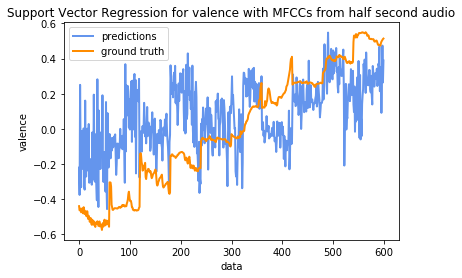

pearson correlation coefficient 0.561247698504


In [62]:
plot_results(.5, 'valence')